In [24]:
from ultralytics import YOLO

# Carga el modelo ya entrenado (puedes usar 'best.pt' o 'last.pt')
model = YOLO('/home/luis/Documents/UTEC/Computer_Vision/proyecto/models/runs/pose/train/weights/best.pt')

# Ejecuta la predicción sobre una imagen

img_path = "../preprocessing/data/general/Untitled.jpeg"
results = model.predict(source=img_path, task='pose', imgsz=640, save=True)

for res in results:  # puede contener varios objetos, aunque en tu caso 1 corte = 1 objeto
    kp = res.keypoints  # objeto Keypoints
    coords = kp.xy         # coordenadas en píxeles (N_points × 2)
    coords_norm = kp.xyn   # coordenadas normalizadas (0–1)
    confs = kp.conf        # nivel de confianza por keypoint
    print(coords_norm)
    # Opcional: res.show() para visualizar en pantalla
    res.save()  # guarda la imagen con las keypoints detectadas


image 1/1 /home/luis/Documents/UTEC/Computer_Vision/proyecto/train/../preprocessing/data/general/Untitled.jpeg: 480x640 1 Court, 5.9ms
Speed: 1.1ms preprocess, 5.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /home/luis/Documents/UTEC/Computer_Vision/runs/pose/predict
tensor([[[0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.5862, 0.3236],
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.5797, 0.8390],
         [0.4077, 0.3155],
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.3693, 0.4527],
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.0000

In [29]:
from ultralytics import YOLO
import cv2

# 🚨 Carga ambos modelos ya entrenados
court_model = YOLO("/home/luis/Documents/UTEC/Computer_Vision/proyecto/models/runs/pose/train3/weights/best.pt")
people_model = YOLO("/home/luis/Documents/UTEC/Computer_Vision/proyecto/models/runs/detect/train3/weights/best.pt")

# Ejecuta inferencia en la imagen
img_path = "../preprocessing/data/general/Untitled.jpeg"
base_img = cv2.imread(img_path)
res_court = court_model.predict(source=img_path, task='pose', imgsz=640, save=False)[0]
print(res_court)  # Imprime las coordenadas de los keypoints
annotated = res_court.plot(img = base_img.copy())

res_people = people_model.predict(source=img_path, task='detect', imgsz=640, save=False)[0]

annotated = res_people.plot(img = annotated)

cv2.imshow("Court + People", annotated)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("combinado.jpg", annotated)  # Guardado opcional


image 1/1 /home/luis/Documents/UTEC/Computer_Vision/proyecto/train/../preprocessing/data/general/Untitled.jpeg: 480x640 2 Courts, 5.4ms
Speed: 1.6ms preprocess, 5.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
masks: None
names: {0: 'Court'}
obb: None
orig_img: array([[[124, 141, 127],
        [131, 148, 134],
        [133, 150, 136],
        ...,
        [ 84,  72,  54],
        [ 86,  74,  56],
        [ 86,  74,  56]],

       [[130, 147, 133],
        [133, 150, 136],
        [134, 151, 137],
        ...,
        [ 84,  72,  54],
        [ 85,  73,  55],
        [ 85,  73,  55]],

       [[144, 161, 148],
        [140, 157, 144],
        [140, 157, 144],
        ...,
        [ 82,  70,  52],
        [ 82,  70,  52],
        [ 82,  70,  52]],

       ...,

       [[205, 165,  29],
        [205, 165,  

True


image 1/1 /home/luis/Documents/UTEC/Computer_Vision/proyecto/train/../preprocessing/data/general/Untitled.jpeg: 480x640 2 Courts, 5.4ms
Speed: 1.1ms preprocess, 5.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Court


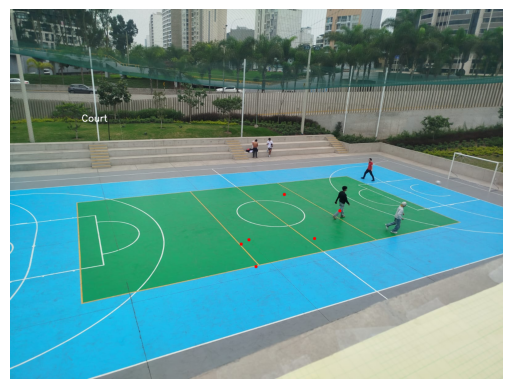

In [27]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

court_model = YOLO("/home/luis/Documents/UTEC/Computer_Vision/proyecto/models/runs/pose/train3/weights/best.pt")
res_court = court_model.predict(source=img_path, imgsz=640, save=False)

img_path = "../preprocessing/data/general/Untitled.jpeg"
base_img = cv2.imread(img_path)

for pose in res_court:  # puede contener varios objetos, aunque en tu caso 1 corte = 1 objeto
    # Obtener clase del objeto (ej. basketball)
    if pose.boxes is not None and len(pose.boxes.cls) > 0:
        cls_id = int(pose.boxes.cls[0].item())
        cls_name = pose.names[cls_id]
    else:
        cls_name = "Unknown"

    print(cls_name)
    try: 
        # Dibujar etiqueta de clase
        box = pose.boxes.xyxy[0].cpu().numpy().astype(int)
        cv2.putText(base_img, cls_name, (box[0], box[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

        # Extraer keypoints y fiabilidad
        kpts_xy = pose.keypoints.xy
        kpts_conf = pose.keypoints.conf

        for person_kpts, person_conf in zip(kpts_xy, kpts_conf):
            pts = person_kpts.cpu().numpy()   # shape (N,2)
            confs = person_conf.cpu().numpy() # shape (N,)

            # Dibujar keypoints
            for (x, y), c in zip(pts, confs):
                if c > 0.5:
                    cv2.circle(base_img, (int(x), int(y)), 5, (0, 0, 255), -1)
    except Exception as e:
        print(f"Error procesando pose: {e}")
# Mostrar con Matplotlib
plt.imshow(cv2.cvtColor(base_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show(block=False)
plt.pause(0.000001)